In [3]:
#final output contains the merged file for sulfate, nitrate and the metadata etc.
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             mean_absolute_percentage_error, explained_variance_score, 
                             max_error, mean_squared_log_error, median_absolute_error, 
                             r2_score, mean_poisson_deviance, mean_gamma_deviance)

In [4]:
df = pd.read_csv('/Users/defne/Downloads/final_version_camx_withLU.csv')
# Remove the Unnamed: 0 and Datetime columns
df = df.drop(columns=['station_id', 'Date'])

/var/folders/fs/9hkffwc95yz53x44d27zb2ym0000gn/T/ipykernel_16643/1206356950.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/defne/Downloads/final_version_camx_withLU.csv')


In [5]:
df.columns

Index(['site_latitude', 'site_longitude', 'NO3', 'SO4', 'NO3-', 'SO42-',
       'elevation_1k', 'elevation_yNA_bNA', 'road_class_1_700',
       'road_class_2_50', 'road_class_1_500', 'road_class_3_50',
       'road_class_2_400', 'road_class_1_100', 'road_class_2_700',
       'road_class_3_100', 'road_class_2_500', 'road_class_1_400',
       'road_class_3_400', 'road_class_1_2000', 'road_class_3_1000',
       'road_class_3_10000', 'road_class_1_300', 'road_class_3_500',
       'road_class_2_2000', 'road_class_1_1000', 'road_class_3_300',
       'road_class_2_200', 'road_class_1_200', 'road_class_2_1000',
       'road_class_1_5000', 'road_class_1_50', 'road_class_3_200',
       'road_class_3_5000', 'road_class_2_300', 'road_class_2_5000',
       'road_class_3_2000', 'road_class_2_100', 'road_class_3_700',
       'road_class_2_10000', 'road_class_1_10000', 'imd_b500', 'imd_b1000',
       'imd', 'CLC', 'snow_ice_b1000', 'snow_ice_b500', 'urban_fabric_b1000',
       'urban_fabric_b500', 'in

In [7]:
df.shape

(155630, 77)

In [8]:
for colname in df.columns:
    df = df[pd.to_numeric(df[colname], errors='coerce').notnull()]

In [10]:
#Initial version without the cross validation
# Define the variable to predict (Nitrate) and features

y = df['NO3-'] 
X = df.drop(columns=['NO3-'])  # Drop the target column from the features

# Split the data into training and validation sets
xv = X.sample(frac=0.2)        # X for validation (20%)
xx = X.drop(xv.index)          # X for training (80%)
yv = y.loc[xv.index]           # Y for validation (20%)
yx = y.drop(xv.index) # Y for training (80%)

#print(xx)
# Initialize and train the RandomForestRegressor
regr = RandomForestRegressor(max_depth=130, random_state=125) # Need to tune these parameters
regr.fit(xx, yx)  # Train with training data (80%)

# Make predictions
y_tra = regr.predict(xx)  # Predictions on training set
y_val = regr.predict(xv)  # Predictions on validation set


0.762415256737494
Mean Absolute Error (MAE): 1.2385003618613675
Mean Squared Error (MSE): 6.355010795191109
Root Mean Squared Error (RMSE): 2.5209146743178574


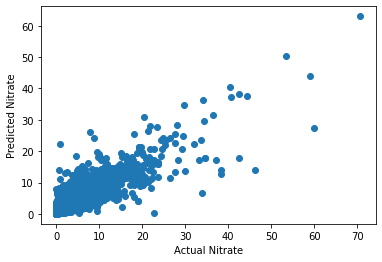

(3955,)
(3955,)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming regr, xv, yv, and y_val are defined and the model is trained
print(regr.score(xv, yv))
print('Mean Absolute Error (MAE):', mean_absolute_error(yv, y_val))
print('Mean Squared Error (MSE):', mean_squared_error(yv, y_val))
print('Root Mean Squared Error (RMSE):', mean_squared_error(yv, y_val, squared=False))

# Convert yv to float
yv = pd.to_numeric(yv, errors='coerce')

# Plot results
plt.figure()
plt.scatter(yv, y_val)
plt.xlabel('Actual Nitrate')
plt.ylabel('Predicted Nitrate')

# Set x-ticks
xtick_range = np.arange(yv.min(), yv.max(), 10)
plt.xticks(xtick_range)

plt.show()

print(yv.shape)
print(y_val.shape)


In [20]:
df = pd.read_csv('/Users/defne/Downloads/final_version_camx_withLU.csv')
# Remove the Unnamed: 0 and Datetime columns
df = df.drop(columns=['station_id', 'Date'])

/var/folders/fs/9hkffwc95yz53x44d27zb2ym0000gn/T/ipykernel_16643/1206356950.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/defne/Downloads/final_version_camx_withLU.csv')


In [21]:
for colname in df.columns:
    df = df[pd.to_numeric(df[colname], errors='coerce').notnull()]


In [22]:
df.shape

(19776, 77)

In [23]:
from sklearn.model_selection import cross_val_score
# Define the target variable (Nitrate) and features
y = df['NO3-']  
X = df.drop(columns=['NO3-'])  # Drop the target column from the features

# Initialize the RandomForestRegressor
regr = RandomForestRegressor(max_depth=200, random_state=666) #Need to tune these parameters

# Perform cross-validation
cv_scores = cross_val_score(regr, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Train the model on the entire dataset
regr.fit(X, y)

Cross-validation scores: [ 0.49965992  0.62869165 -0.70893163  0.68106865  0.78470153]
Mean CV Score: 0.37703802238757733


RandomForestRegressor(max_depth=200, random_state=666)

In [24]:
#Demonstrating the performance after cross validation
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=666)

In [25]:
# Train on training data and evaluate on validation data
# Initialize the RandomForestRegressor
regr = RandomForestRegressor(max_depth=200, random_state=666)
regr.fit(X_train, y_train)
y_val_pred = regr.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

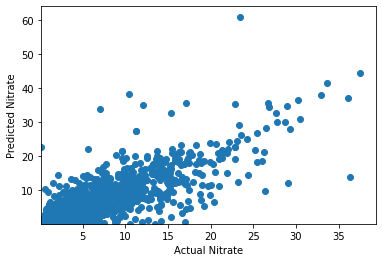

In [26]:
# Plot results
y_val = pd.to_numeric(y_val, errors='coerce')
plt.figure()
plt.scatter(y_val_pred, y_val)
plt.xlabel('Actual Nitrate')
plt.ylabel('Predicted Nitrate')
plt.xlim(0.1)
plt.ylim(0.1)
plt.show()
